In [2]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from torchviz import make_dot
import sys
sys.path.append('.')
from utility import *

## HW1-1-1

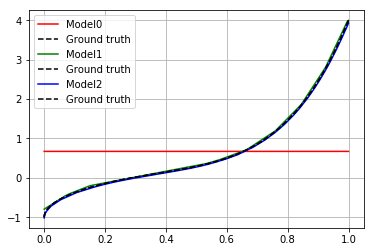

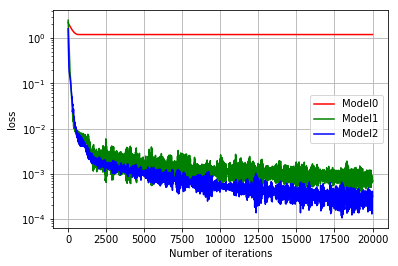

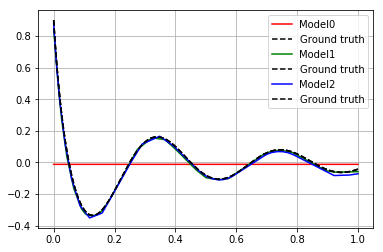

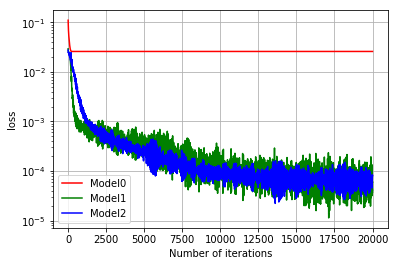

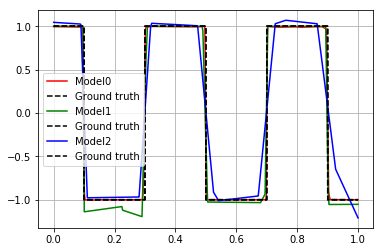

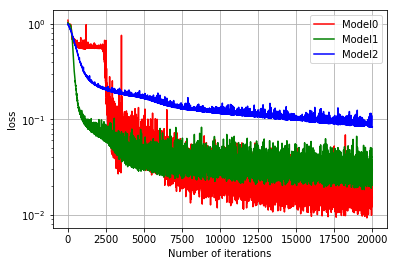

In [3]:
color = 'rgb'
folder = 'Results1-1-1/'
for num_func in range(3):
    for num_model in range(3):
        data_save_file_name = folder+'func'+str(num_func)+'_model'+str(num_model)+'_data.dat'
        loss_save_file_name = folder+'func'+str(num_func)+'_model'+str(num_model)+'_loss.dat'
        data_read = pd.read_csv(data_save_file_name)
        plt.figure(1+(num_func-1)*2), 
        plt.plot(data_read["x"], data_read["yhat"], color[num_model], label='Model'+str(num_model)), plt.grid(True)

        loss_read = pd.read_csv(loss_save_file_name)
        plt.figure(2+(num_func-1)*2), 
        plt.semilogy(loss_read, color[num_model], label='Model'+str(num_model))
        plt.xlabel('Number of iterations')
        plt.ylabel('loss')
        plt.grid(True)

        plt.figure(1+(num_func-1)*2), plt.plot(data_read["x"], data_read["y"], 'k--', label='Ground truth'), plt.grid(True)
        plt.legend(loc=0)
        plt.savefig(folder+'hw1_1_1_func'+str(num_func)+'.jpg', dpi=600, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format='jpg',
                transparent=False, bbox_inches=None, pad_inches=0.1,
                frameon=None)
        plt.figure(2+(num_func-1)*2), plt.legend(loc=0)
        plt.savefig(folder+'hw1_1_1_loss'+str(num_func)+'.jpg', dpi=600, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format='jpg',
                transparent=False, bbox_inches=None, pad_inches=0.1,
                frameon=None)

571


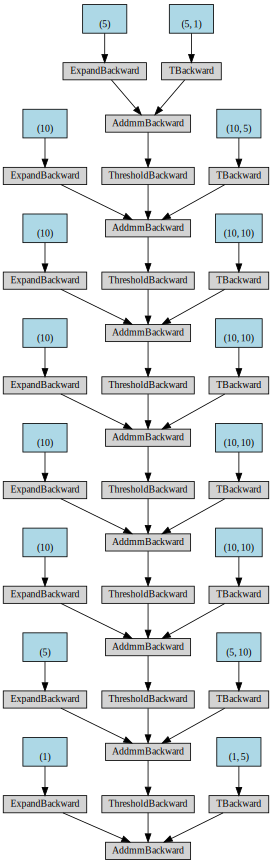

In [4]:
model = nn.Sequential()
model.add_module('W0', nn.Linear(8, 16))
model.add_module('tanh', nn.Tanh())
model.add_module('W1', nn.Linear(16, 1))

x = Variable(torch.randn(1,1))

print_net = Net0()
y = print_net(x)
print(model_params(print_net))
make_dot(y)

## HW 1-1-2

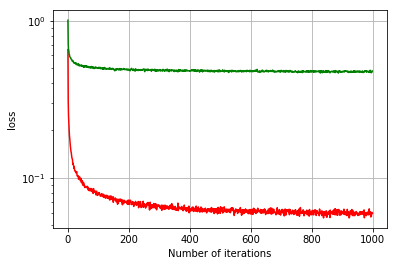

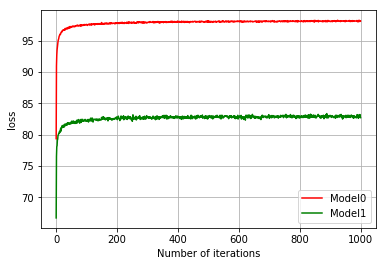

In [5]:
color = 'rgb'
num_func = 0
times = 0
folder = 'Results1-1-2/'
for num_model in range(2):
    loss_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_loss'+str(times)+'.dat'
    accu_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_accu'+str(times)+'.dat'
    
    loss_read = pd.read_csv(loss_save_file_name)
    plt.figure(1), 
    plt.semilogy(loss_read, color[num_model], label='Model'+str(num_model))
    plt.xlabel('Number of iterations')
    plt.ylabel('loss')
    plt.grid(True)
    plt.savefig(folder+'hw1_1_2_loss.jpg', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='jpg',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
    accu_read = pd.read_csv(accu_save_file_name)
    plt.figure(2), 
    plt.plot(accu_read, color[num_model], label='Model'+str(num_model))
    plt.xlabel('Number of iterations')
    plt.ylabel('loss')
    plt.grid(True)
    plt.savefig(folder+'hw1_1_2_accu.jpg', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='jpg',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

plt.legend(loc=0)

## HW1-2-1

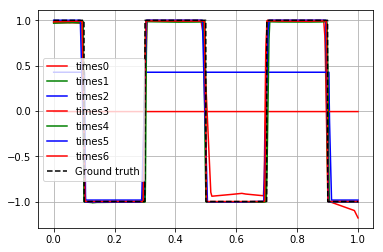

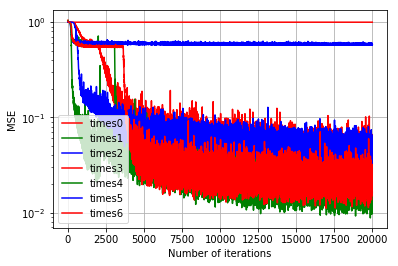

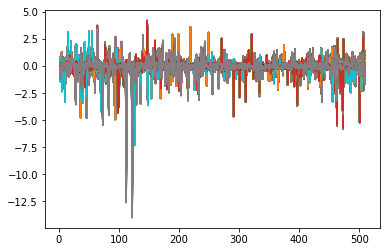

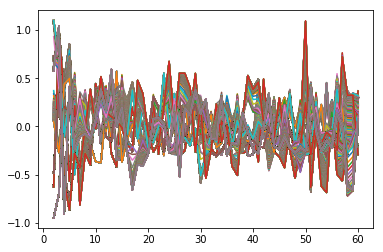

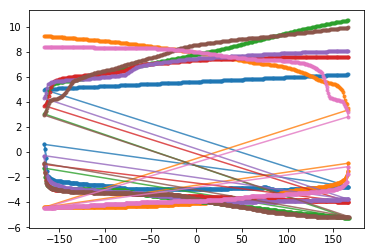

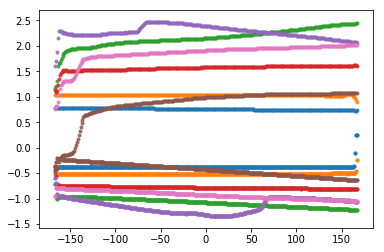

In [9]:
from sklearn.decomposition import PCA
color = 'rgb'
num_func = 2
num_model = 0
folder = 'Results1-2-1/'

def read_data_nf(num_model, times):
    samples_weight = np.array([])
    for num_func in range(0,2):
        data_save_file_name = folder+'func'+str(num_func)+'_model'+str(num_model)+'_data'+str(times)+'.dat'
        loss_save_file_name = folder+'func'+str(num_func)+'_model'+str(num_model)+'_loss'+str(times)+'.dat'
        weight_save_file_name = folder+'func'+str(num_func)+'_model'+str(num_model)+'_weight'+str(times)+'.dat'
        bias_save_file_name = folder+'func'+str(num_func)+'_model'+str(num_model)+'_bias'+str(times)+'.dat'
        weight_read = pd.read_csv(weight_save_file_name, header=None)    
        bias_read = pd.read_csv(bias_save_file_name, header=None)
        loss_read = pd.read_csv(loss_save_file_name, header=None)
        if not samples_weight.size:
            samples_weight = weight_read
            samples_loss = loss_read[1:-1:60]
        samples_weight = np.hstack((samples_weight, weight_read))
        samples_loss = np.vstack((samples_loss, loss_read[1:-1:60]))
    return samples_weight, samples_loss

for times in range(0,7):
    data_save_file_name = folder+'func'+str(num_func)+'_model'+str(num_model)+'_data'+str(times)+'.dat'
    loss_save_file_name = folder+'func'+str(num_func)+'_model'+str(num_model)+'_loss'+str(times)+'.dat'
    weight_save_file_name = folder+'func'+str(num_func)+'_model'+str(num_model)+'_weight'+str(times)+'.dat'
    bias_save_file_name = folder+'func'+str(num_func)+'_model'+str(num_model)+'_bias'+str(times)+'.dat'
    data_read = pd.read_csv(data_save_file_name)
    plt.figure(1), 
    plt.plot(data_read["x"], data_read["yhat"], color[times%3], label='times'+str(times)), plt.grid(True)

    loss_read = pd.read_csv(loss_save_file_name)
    plt.figure(2), 
    plt.semilogy(loss_read, color[times%3], label='times'+str(times))
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE')
    plt.grid(True)
    
    weight_read = pd.read_csv(weight_save_file_name, header=None)
    plt.figure(3), plt.plot(weight_read[2:-1], label='Times'+str(times))
    
    bias_read = pd.read_csv(bias_save_file_name, header=None)
    plt.figure(4), plt.plot(bias_read[2:-1], label='Times'+str(times))

plt.figure(1), plt.plot(data_read["x"], data_read["y"], 'k--', label='Ground truth'), plt.grid(True)
plt.legend(loc=0)
plt.figure(2), plt.legend(loc=0)


pca = PCA(n_components=2)
exec('net = Net%s() ' % num_model)
for times in range(7):
    samples_weight, samples_loss = read_data_nf(num_model, times)

    pc1 = pca.fit_transform(np.transpose(samples_weight))
    fig = plt.figure(5)
    plt.plot(pc1[:,0],pc1[:,1],alpha=0.8, marker='.')
    
    pc2 = pca.fit_transform(np.transpose(samples_weight[0:len(net.fc1.weight),:]))
    plt.figure(6),  plt.scatter(pc2[:,0], pc2[:,1],alpha=0.8, marker='.')
    """
    plt.plot(pc1[0,0], pc1[0,1], 'ro')
    ax = plt.axes()
    ax.quiver(pc1[301,0], pc1[301,1], pc1[302,0]-pc1[301,0], pc1[302,1]-pc1[301,1], 
          angles='xy', scale_units='xy', color='b', width=0.008)
    ax.quiver(pc1[201,0], pc1[201,1], pc1[202,0]-pc1[201,0], pc1[202,1]-pc1[201,1], 
          angles='xy', scale_units='xy', color='b', width=0.008)
    ax.quiver(pc1[101,0], pc1[101,1], pc1[102,0]-pc1[101,0], pc1[102,1]-pc1[101,1], 
          angles='xy', scale_units='xy', color='b', width=0.008)
    ax.quiver(pc1[10,0], pc1[10,1], pc1[11,0]-pc1[10,0], pc1[11,1]-pc1[10,1], 
          angles='xy', scale_units='xy', color='b', width=0.008)
    """

In [ ]:
from sklearn.decomposition import PCA
color = 'rgb'
num_model = 1
folder = 'Results1-1-2/'

def read_data_nf(num_model, times):
    samples_weight = np.array([])
    for num_func in range(0,2):
        loss_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_loss'+str(times)+'.dat'
        weight_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_weight'+str(times)+'.dat'
        bias_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_bias'+str(times)+'.dat'
        weight_read = pd.read_csv(weight_save_file_name, header=None)    
        bias_read = pd.read_csv(bias_save_file_name, header=None)
        loss_read = pd.read_csv(loss_save_file_name, header=None)
        if not samples_weight.size:
            samples_weight = weight_read
            samples_loss = loss_read[1:-1:60]
        samples_weight = np.hstack((samples_weight, weight_read))
        samples_loss = np.vstack((samples_loss, loss_read[1:-1:60]))
    return samples_weight, samples_loss

for times in range(0,7):
    loss_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_loss'+str(times)+'.dat'
    weight_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_weight'+str(times)+'.dat'
    bias_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_bias'+str(times)+'.dat'
    
    loss_read = pd.read_csv(loss_save_file_name)
    plt.figure(1), 
    plt.semilogy(loss_read, color[times%3], label='times'+str(times))
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE')
    plt.grid(True)
    
    weight_read = pd.read_csv(weight_save_file_name, header=None)
    plt.figure(2), plt.plot(weight_read[2:-1], label='Times'+str(times))
    
    bias_read = pd.read_csv(bias_save_file_name, header=None)
    plt.figure(3), plt.plot(bias_read[2:-1], label='Times'+str(times))

plt.legend(loc=0)
plt.figure(2), plt.legend(loc=0)

(<matplotlib.figure.Figure at 0x7f2ad30481d0>,
 <matplotlib.legend.Legend at 0x7f2ac277ad30>)

In [ ]:
pca = PCA(n_components=2)
exec('net = Net%s() ' % num_model)
for times in range(7):
    samples_weight, samples_loss = read_data_nf(num_model, times)

    pc1 = pca.fit_transform(np.transpose(samples_weight))
    fig = plt.figure(5)
    plt.plot(pc1[:,0],pc1[:,1],alpha=0.8, marker='.')
    
    pc2 = pca.fit_transform(np.transpose(samples_weight[0:len(net.fc1.weight),:]))
    plt.figure(6),  plt.scatter(pc2[:,0], pc2[:,1],alpha=0.8, marker='.')

## HW1-2-2

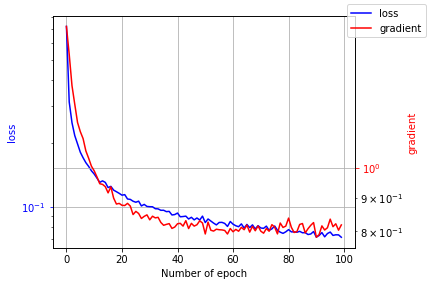

In [7]:
folder = 'Results1-2-2/'
color = 'rgb'
num_model = 0
times = 1
data_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_accu'+str(times)+'.dat'
loss_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_loss'+str(times)+'.dat'
grad_save_file_name = folder+'mnist'+'_model'+str(num_model)+'_grad'+str(times)+'.dat'
loss_read = pd.read_csv(loss_save_file_name)

grad_read = pd.read_csv(grad_save_file_name)

fig, ax1 = plt.subplots()
ax1.semilogy(loss_read, 'b-', label='loss')
ax1.set_xlabel('Number of epoch')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('loss', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.semilogy(grad_read, 'r-', label='gradient')
ax2.set_ylabel('gradient', color='r')
ax2.tick_params('y', colors='r')
ax1.grid(True)
ax2.grid(True)

fig.legend(loc=1)
fig.tight_layout()
plt.savefig(folder+'hw1_2_2.jpg', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='jpg',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()